In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mpld3

import rain

In [2]:
mpld3.disable_notebook()
#mpld3.enable_notebook()

In [3]:
FREQUENCY = 600

df = pd.read_csv(rain.toRelPath("data/df-cache.csv"))
df = df.iloc[::int(2 * FREQUENCY), :]
df.reset_index(inplace = True)

mid = df["mid"]
volume = df["volume"]
print(mid)

0      7436.995
1      7443.365
2      7444.240
3      7438.675
4      7423.825
5      7435.185
6      7450.050
7      7439.340
8      7438.525
9      7460.690
10     7465.395
11     7503.895
12     7559.835
13     7490.325
14     7481.580
15     7470.470
16     7412.630
17     7428.035
18     7371.105
19     7375.335
20     7402.425
21     7405.195
22     7382.115
23     7400.010
24     7350.955
25     7355.920
26     7348.945
27     7331.245
28     7363.285
29     7366.720
         ...   
603    7521.180
604    7522.035
605    7522.265
606    7531.505
607    7526.435
608    7392.315
609    7419.700
610    7390.670
611    7380.075
612    7390.050
613    7365.510
614    7396.690
615    7404.820
616    7413.495
617    7408.400
618    7398.715
619    7399.655
620    7401.350
621    7409.030
622    7410.955
623    7398.565
624    7411.910
625    7439.640
626    7448.260
627    7456.420
628    7451.750
629    7464.350
630    7458.345
631    7465.680
632    7472.595
Name: mid, Length: 633, 

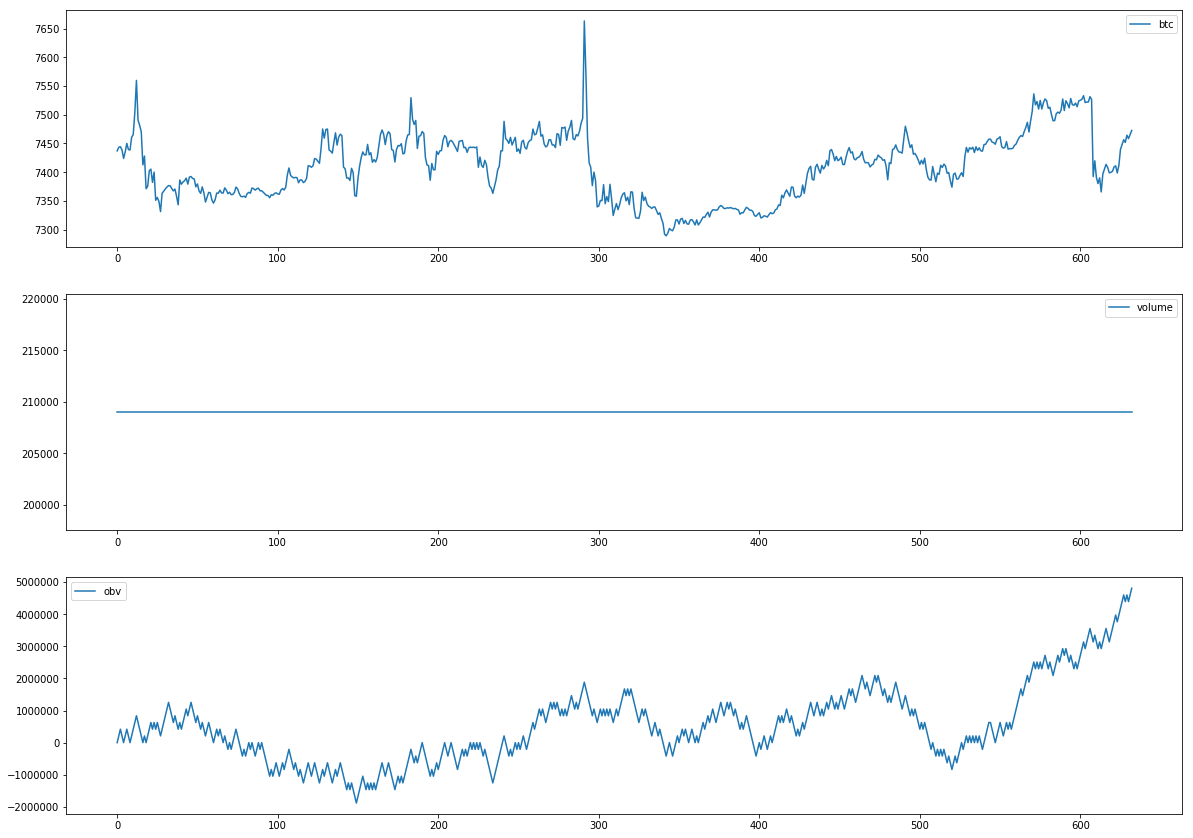

In [7]:
FEE_RATIO = 25 * 1e-4

def computeOBV(series, volume):
	obv = [0]
	for a in range(1, len(series)):
		if series[a] > series[a - 1]:
			obv.append(obv[-1] + volume[a])
		elif series[a] == series[a - 1]:
			obv.append(obv[-1])
		else:
			obv.append(obv[-1] - volume[a])
	return pd.Series(obv)

obv = computeOBV(mid, volume)

plt.figure(figsize = (20, 40))
plt.subplot(4, 1, 1)
plt.plot(mid, label = "btc")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(volume, label = "volume")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(obv, label = "obv")
plt.legend()
plt.show()